# Analysis of stratification in the fjord

This notebook shows an analysis of the physical characteristics of the fjord to locate potential locations for the release. Density is calculated using temperature and salinity, and profiles and colormaps are plotted to provide an overview of the physical characteristics of the fjord.
The analysis is primarily based on a 100 m resolution model output for the summer months of 2012.

The modules needed are as follows (note a regridding tool is used):

In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import xrscipy
import numpy as np
import cartopy.crs as ccrs
import xesmf as xe
from matplotlib import colorbar, colors
from matplotlib.cm import get_cmap
from roms_regrid import *
from density import *

## Loading and regridding data.

Data and grid information is loaded in. A time average is calculated and a regridding is performed to get the model output in lat/lon format. Temperature and salinity are loaded as variables.

In [6]:

grid=xr.open_mfdataset('/expanse/lustre/projects/cos100/uheede/Iceland3_grd.nc')
x=xr.open_mfdataset('/expanse/lustre/projects/cos100/uheede/roms/run/Iceland3/z_data/july/z_Iceland3_rnd.201207*.nc', combine='nested', concat_dim=["time"])
#x=xr.open_mfdataset('/expanse/lustre/projects/cos100/uheede/roms/run/Iceland3/Iceland3_rnd.20120516130000.nc', combine='nested', concat_dim=["time"])

x=x.mean('time')
t=x['t']
s=x['s']

t=roms_regrid(grid,t)
s=roms_regrid(grid,s)
t=t.where(t != 0)
s=s.where(s != 0)


In [7]:
t.load()

<xarray.DataArray (depth: 34, lat: 722, lon: 722)>
array([[[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [      nan, 11.660488, 11.645719, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
...
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]]], dtype=float32)
Coordinates:
  * depth    (depth) float32 -0.0 -1.0 -2.0 -3.0 ... -220.0 -240.0 -260.0 -280.0
  * lon      (lon) float64 337.2 337.2 337.2 337.2 ... 338.7 338.7 338.7 338.7
  * lat      (lat) float64 63.92 63.92 63.93 63.93 ... 64.57 64.57 64.57 64.57
Attributes:
    regrid_method:  bilinear

In [8]:
s.load()

<xarray.DataArray (depth: 34, lat: 722, lon: 722)>
array([[[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [      nan, 32.305927, 32.305267, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
...
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]]], dtype=float32)
Coordinates:
  * depth    (depth) float32 -0.0 -1.0 -2.0 -3.0 ... -220.0 -240.0 -260.0 -280.0
  * lon      (lon) float64 337.2 337.2 337.2 337.2 ... 338.7 338.7 338.7 338.7
  * lat      (lat) float64 63.92 63.92 63.93 63.93 ... 64.57 64.57 64.57 64.57
Attributes:
    regrid_method:  bilinear

A density calculation using equation of state for surface pressure is defined with s and t as inputs. Density is then saved as as a datavariable in xarray

In [9]:
density=dens0(s,t)
den = xr.DataArray(
    data=density,
    dims=["depth", "lat", "lon"],
    coords=dict(
        lon=(t.lon),
        lat=(t.lat),
        depth=(t.depth),
        
        
    ),
    attrs=dict(
        description="density",
        units="kg/m3",
    ),
)

We can now identify some transects in the fjord for which we which to plot density profiles

## Density plots

(-40.0, 0.0)

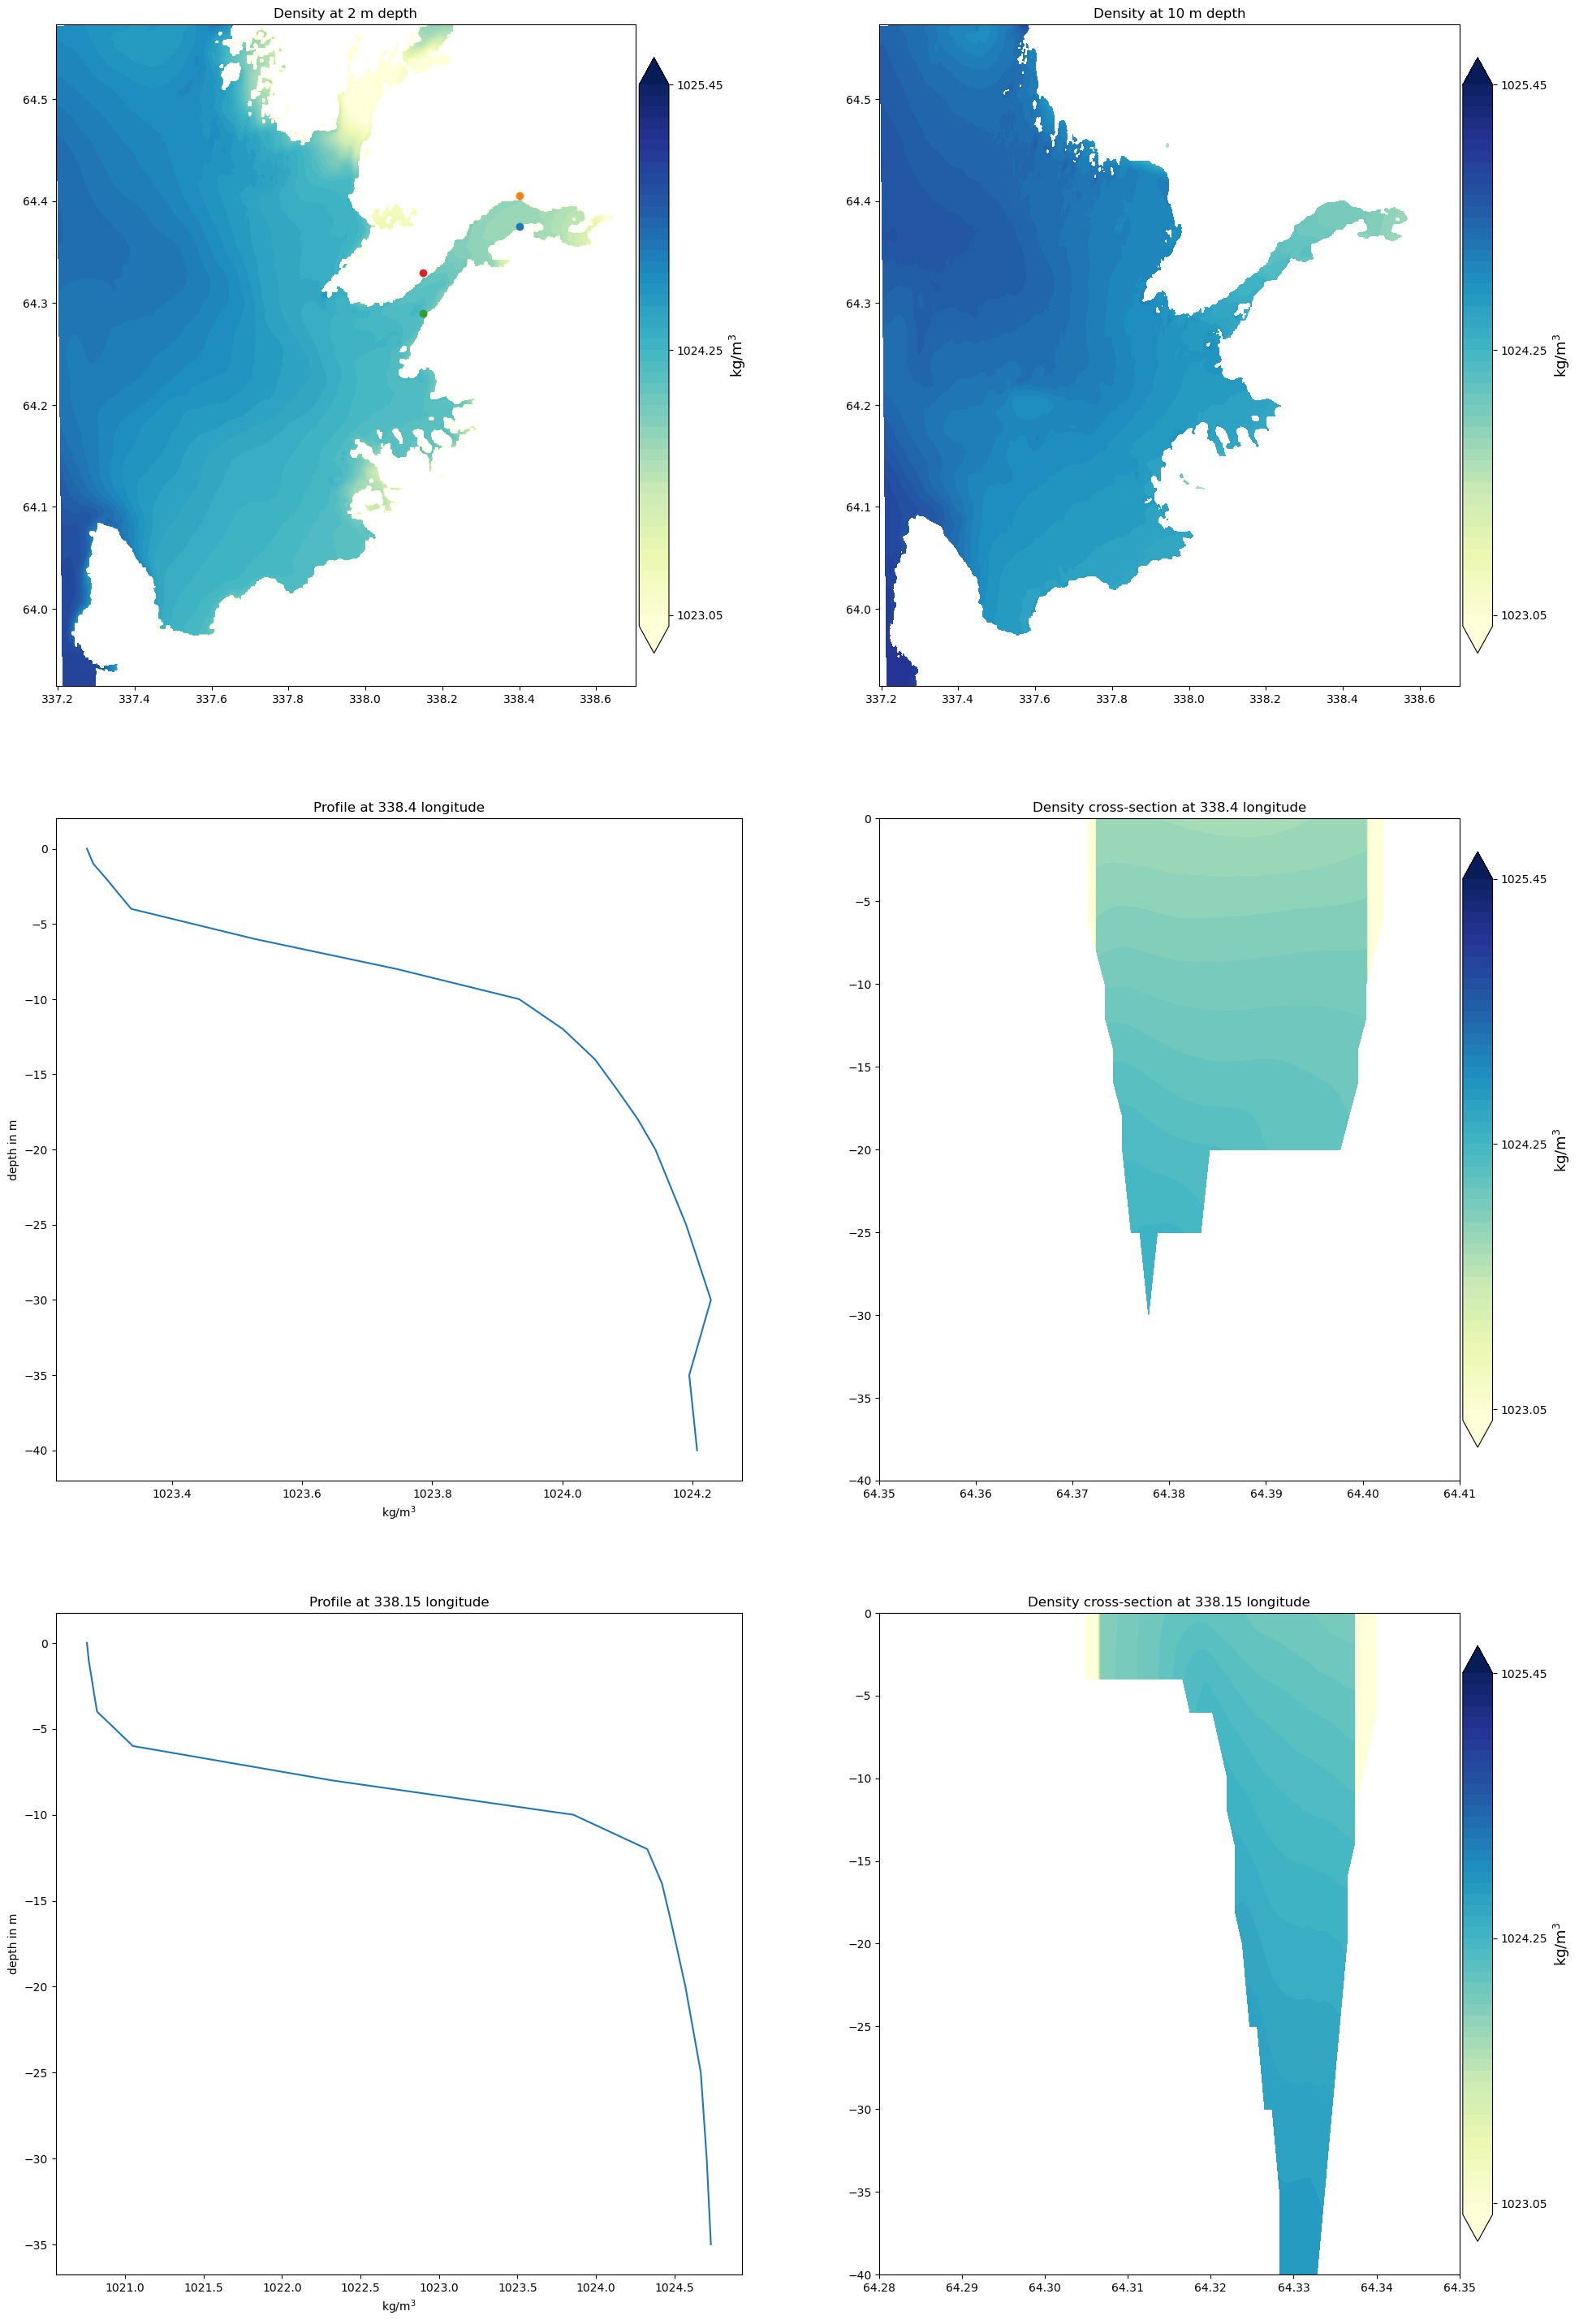

In [10]:
#plt.contourf(den.sel(depth=100,method='nearest'))
from matplotlib.collections import LineCollection
fig, axarr = plt.subplots(nrows=3, ncols=2, figsize=(8*3, 12*3))
axlist = axarr.flatten()
k1=1023
k2=1025.5
k3=0.05

#k1=5
#k2=10
#k3=0.5

#k3=0.5
plt.rcParams['hatch.linewidth'] = 0.4
levels = np.arange(k1, k2, k3)
cmap = 'YlGnBu'
cmap2 = 'BrBG'

lat1=64.375
lat2=64.405
lon1=338.4
lon2=338.4
lat3=64.29
lat4=64.33
lon3=338.15
lon4=338.15

cf1=axlist[0].contourf(den.lon,t.lat,den.sel(depth=-2),levels, extend="both", cmap=cmap, vmin=k1, vmax=k2)
cb1 = fig.colorbar(cf1, ax=axlist[0], orientation='vertical', shrink=0.9, pad=0.005,ticks=[k1+k3, (k1+k2)/2, k2-k3])
axlist[0].plot(lon1, lat1, marker="o", ls="")
axlist[0].plot(lon2, lat2, marker="o", ls="")
axlist[0].plot(lon3, lat3, marker="o", ls="")
axlist[0].plot(lon4, lat4, marker="o", ls="")
axlist[0].set_title('Density at 2 m depth')
cb1.set_label('kg/m$^3$', fontsize=13)
#pts = np.c_[lon1, lat1,lon1,lon1].reshape(len(lon1), 2, 2)
#axlist[0].add_collection(LineCollection(pts, color="crimson", label="Lines"))

cf1=axlist[1].contourf(den.lon,t.lat,den.sel(depth=-10),levels, extend="both", cmap=cmap, vmin=k1, vmax=k2)
cb1 = fig.colorbar(cf1, ax=axlist[1], orientation='vertical', shrink=0.9, pad=0.005,ticks=[k1+k3, (k1+k2)/2, k2-k3])
axlist[1].set_title('Density at 10 m depth')
cb1.set_label('kg/m$^3$', fontsize=13)

cf1=axlist[2].plot(den.sel(lon=slice(338.35,338.45)).mean('lon').sel(lat=slice(64.375,64.395)).mean('lat'), den.depth)
#cf1=axlist[2].plot(den.sel(lon=338,lat=64.28, method='nearest'))
axlist[2].set_title('Profile at 338.4 longitude')
axlist[2].set_ylabel('depth in m')
axlist[2].set_xlabel('kg/m$^3$')

cf1=axlist[3].contourf(den.lat,t.depth,den.sel(lon=338.4, method='nearest'),levels, extend="both", cmap=cmap, vmin=k1, vmax=k2)
cb1 = fig.colorbar(cf1, ax=axlist[3], orientation='vertical', shrink=0.9, pad=0.005,ticks=[k1+k3, (k1+k2)/2, k2-k3])
cb1.set_label('kg/m$^3$', fontsize=13)
axlist[3].set_xlim([64.35,64.41])
axlist[3].set_ylim([-40,0])
axlist[3].set_title('Density cross-section at 338.4 longitude')

cf1=axlist[4].plot(den.sel(lon=slice(338.05,338.15)).mean('lon').sel(lat=slice(64.29,64.33)).mean('lat'), den.depth)
#cf1=axlist[2].plot(den.sel(lon=338,lat=64.28, method='nearest'))
axlist[4].set_title('Profile at 338.15 longitude')
axlist[4].set_ylabel('depth in m')
axlist[4].set_xlabel('kg/m$^3$')

cf1=axlist[5].contourf(den.lat,t.depth,den.sel(lon=338.2, method='nearest'),levels, extend="both", cmap=cmap, vmin=k1, vmax=k2)
cb1 = fig.colorbar(cf1, ax=axlist[5], orientation='vertical', shrink=0.9, pad=0.005,ticks=[k1+k3, (k1+k2)/2, k2-k3])
cb1.set_label('kg/m$^3$', fontsize=13)
axlist[5].set_title('Density cross-section at 338.15 longitude')
axlist[5].set_xlim([64.28,64.35])
axlist[5].set_ylim([-40,0])

## Salinity plots

(-40.0, 0.0)

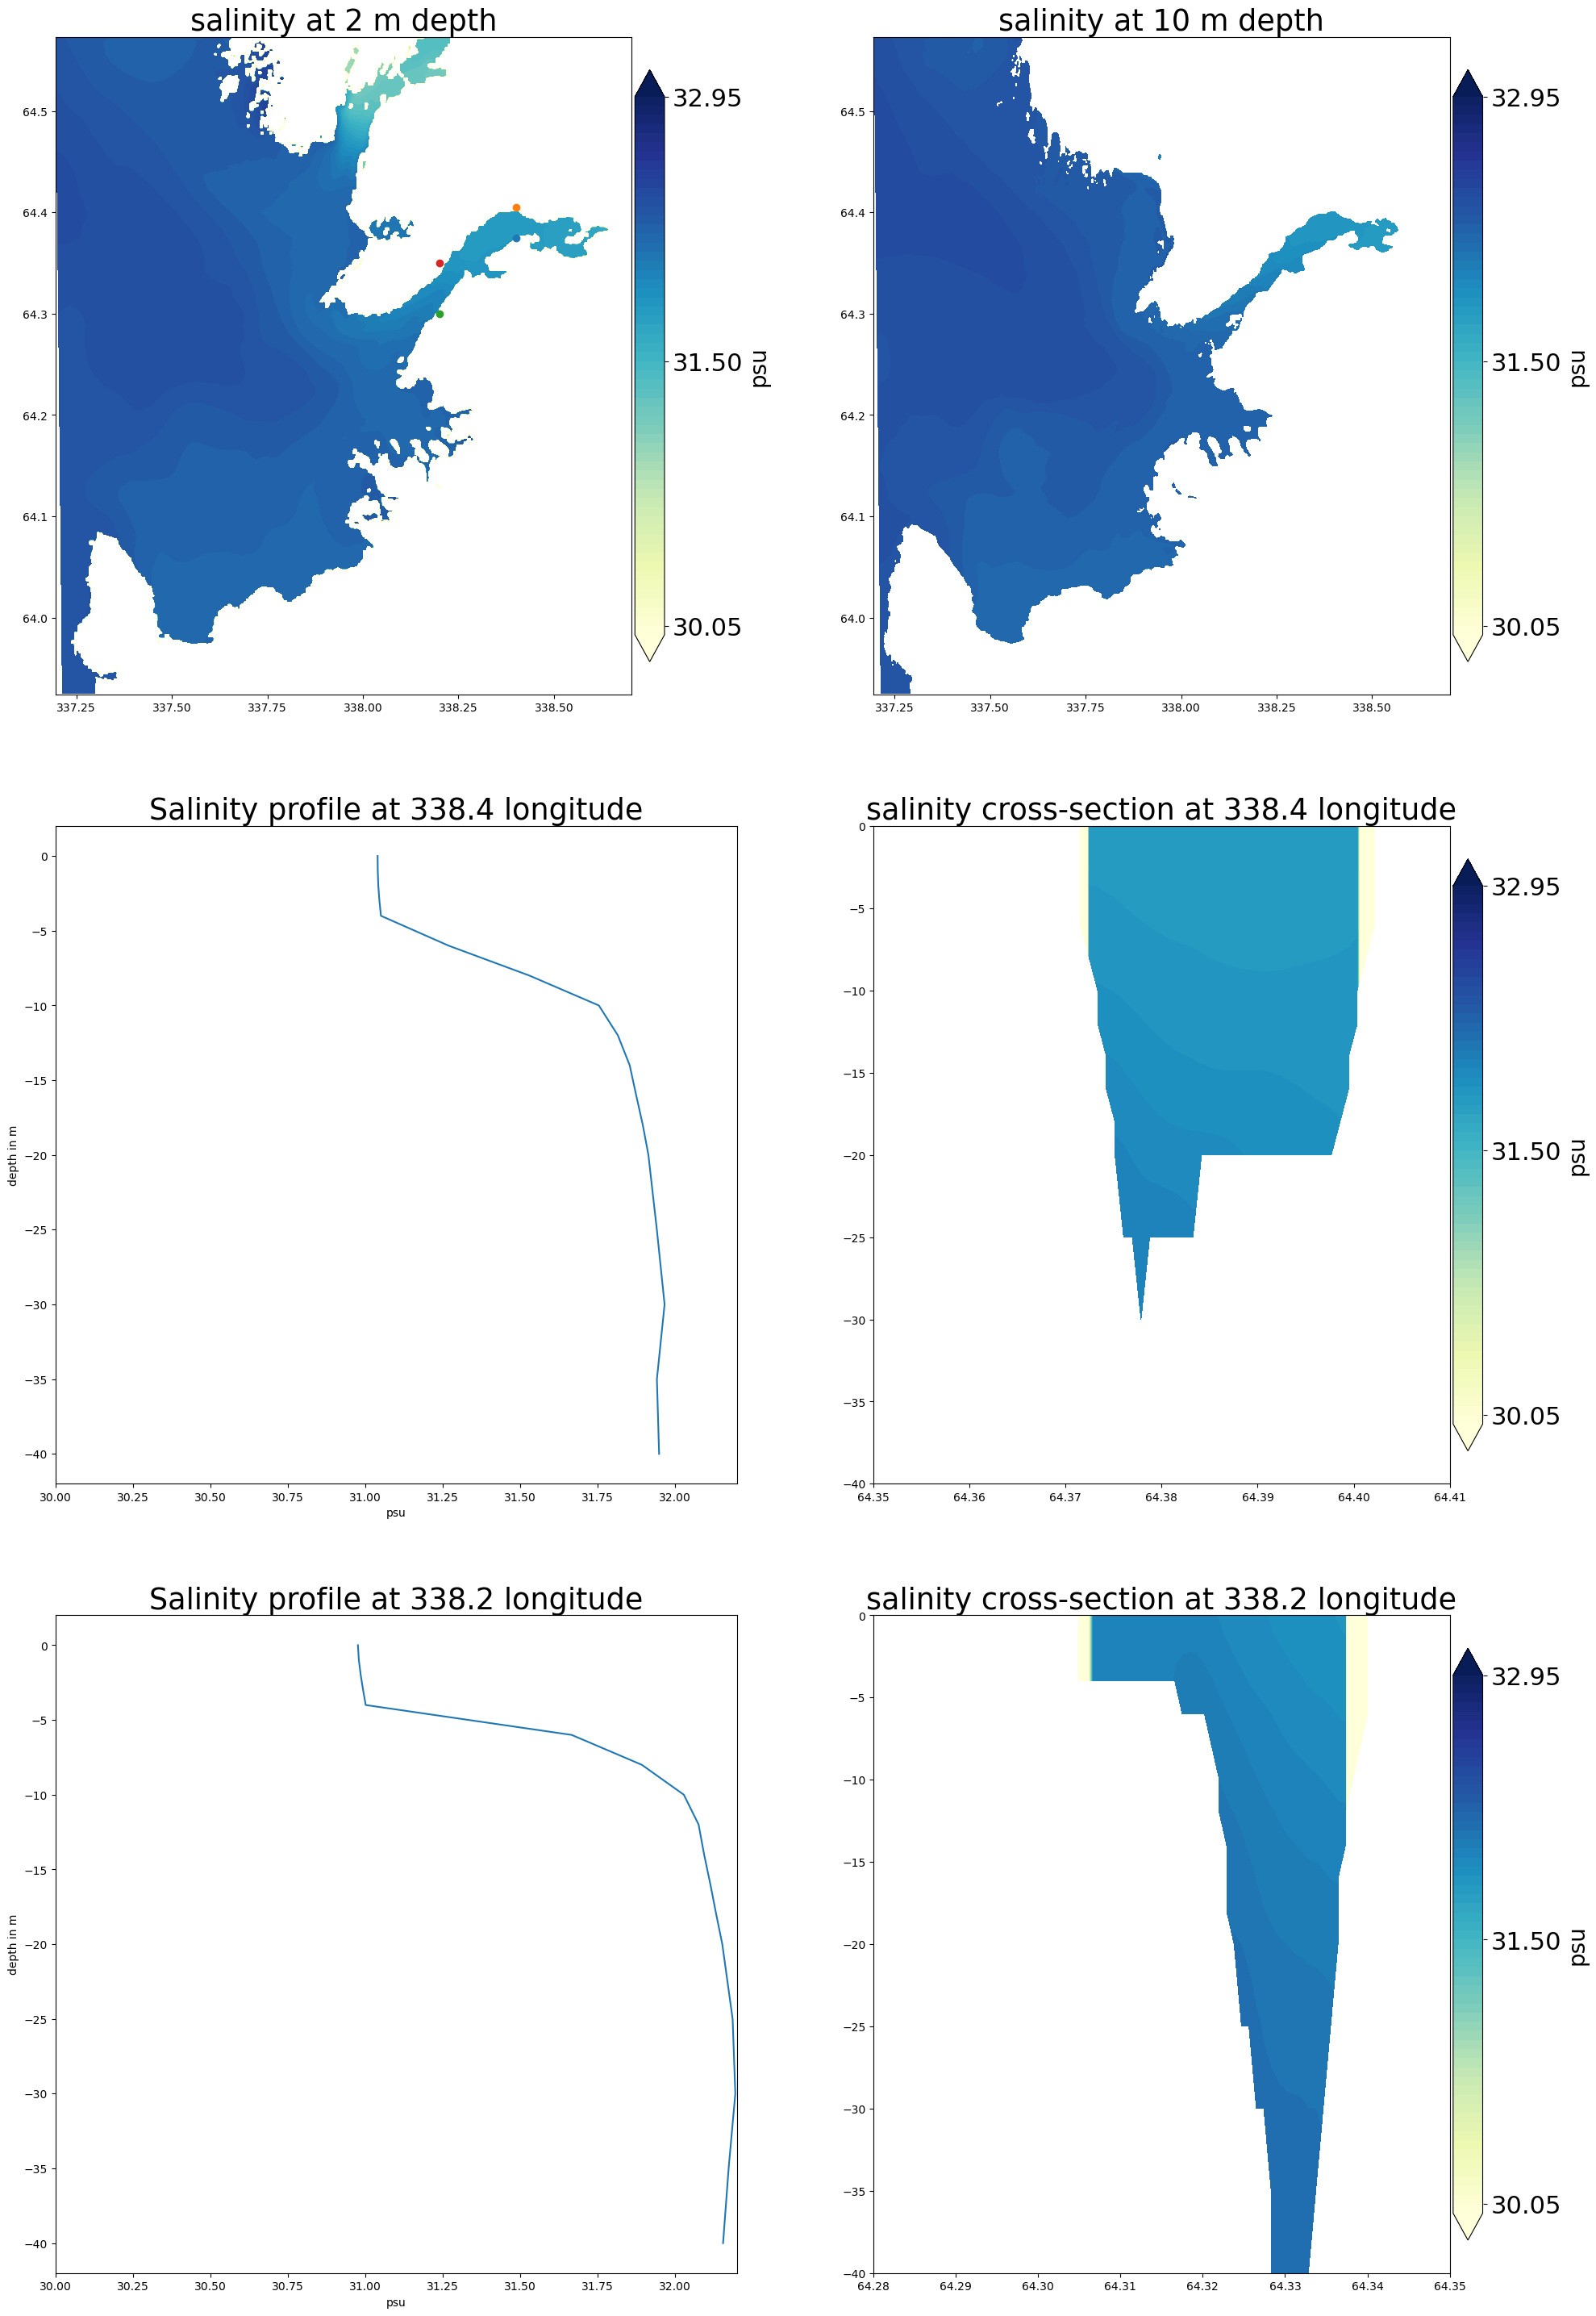

In [11]:
#plt.contourf(den.sel(depth=100,method='nearest'))
from matplotlib.collections import LineCollection
fig, axarr = plt.subplots(nrows=3, ncols=2, figsize=(8*3, 12*3))
axlist = axarr.flatten()
k1=30
k2=33
k3=0.05

#k1=5
#k2=10
#k3=0.5

#k3=0.5
plt.rcParams['hatch.linewidth'] = 0.4
plt.rcParams.update({'font.size': 22})
levels = np.arange(k1, k2, k3)
#cmap = 'plasma'
cmap = 'YlGnBu'

lat1=64.375
lat2=64.405
lon1=338.4
lon2=338.4
lat3=64.30
lat4=64.35
lon3=338.2
lon4=338.2

cf1=axlist[0].contourf(s.lon,s.lat,s.sel(depth=-2),levels, extend="both", cmap=cmap, vmin=k1, vmax=k2)
cb1 = fig.colorbar(cf1, ax=axlist[0], orientation='vertical', shrink=0.9, pad=0.005,ticks=[k1+k3, (k1+k2)/2, k2-k3])
axlist[0].plot(lon1, lat1, marker="o", ls="")
axlist[0].plot(lon2, lat2, marker="o", ls="")
axlist[0].plot(lon3, lat3, marker="o", ls="")
axlist[0].plot(lon4, lat4, marker="o", ls="")
axlist[0].set_title('salinity at 2 m depth')
cb1.set_label('psu', fontsize=20)
#pts = np.c_[lon1, lat1,lon1,lon1].reshape(len(lon1), 2, 2)
#axlist[0].add_collection(LineCollection(pts, color="crimson", label="Lines"))

cf1=axlist[1].contourf(s.lon,s.lat,s.sel(depth=-10),levels, extend="both", cmap=cmap, vmin=k1, vmax=k2)
cb1 = fig.colorbar(cf1, ax=axlist[1], orientation='vertical', shrink=0.9, pad=0.005,ticks=[k1+k3, (k1+k2)/2, k2-k3])
axlist[1].set_title('salinity at 10 m depth')
cb1.set_label('psu', fontsize=20)

cf1=axlist[2].plot(s.sel(lon=slice(338.35,338.45)).mean('lon').sel(lat=slice(64.375,64.395)).mean('lat'), s.depth)
#cf1=axlist[2].plot(den.sel(lon=338,lat=64.28, method='nearest'))
axlist[2].set_title('Salinity profile at 338.4 longitude')
axlist[2].set_ylabel('depth in m')
axlist[2].set_xlabel('psu')
axlist[2].set_xlim([30,32.2])

cf1=axlist[3].contourf(s.lat,s.depth,s.sel(lon=338.4, method='nearest'),levels, extend="both", cmap=cmap, vmin=k1, vmax=k2)
cb1 = fig.colorbar(cf1, ax=axlist[3], orientation='vertical', shrink=0.9, pad=0.005,ticks=[k1+k3, (k1+k2)/2, k2-k3])
cb1.set_label('psu', fontsize=20)
axlist[3].set_xlim([64.35,64.41])
axlist[3].set_ylim([-40,0])
axlist[3].set_title('salinity cross-section at 338.4 longitude')

cf1=axlist[4].plot(s.sel(lon=slice(338.15,338.20)).mean('lon').sel(lat=slice(64.29,64.33)).mean('lat'), s.depth)
#cf1=axlist[2].plot(den.sel(lon=338,lat=64.28, method='nearest'))
axlist[4].set_title('Salinity profile at 338.2 longitude')
axlist[4].set_ylabel('depth in m')
axlist[4].set_xlabel('psu')
axlist[4].set_xlim([30,32.2])

cf1=axlist[5].contourf(s.lat,s.depth,s.sel(lon=338.2, method='nearest'),levels, extend="both", cmap=cmap, vmin=k1, vmax=k2)
cb1 = fig.colorbar(cf1, ax=axlist[5], orientation='vertical', shrink=0.9, pad=0.005,ticks=[k1+k3, (k1+k2)/2, k2-k3])
cb1.set_label('psu', fontsize=20)
axlist[5].set_title('salinity cross-section at 338.2 longitude')
axlist[5].set_xlim([64.28,64.35])
axlist[5].set_ylim([-40,0])

## Temperature plots

(-40.0, 0.0)

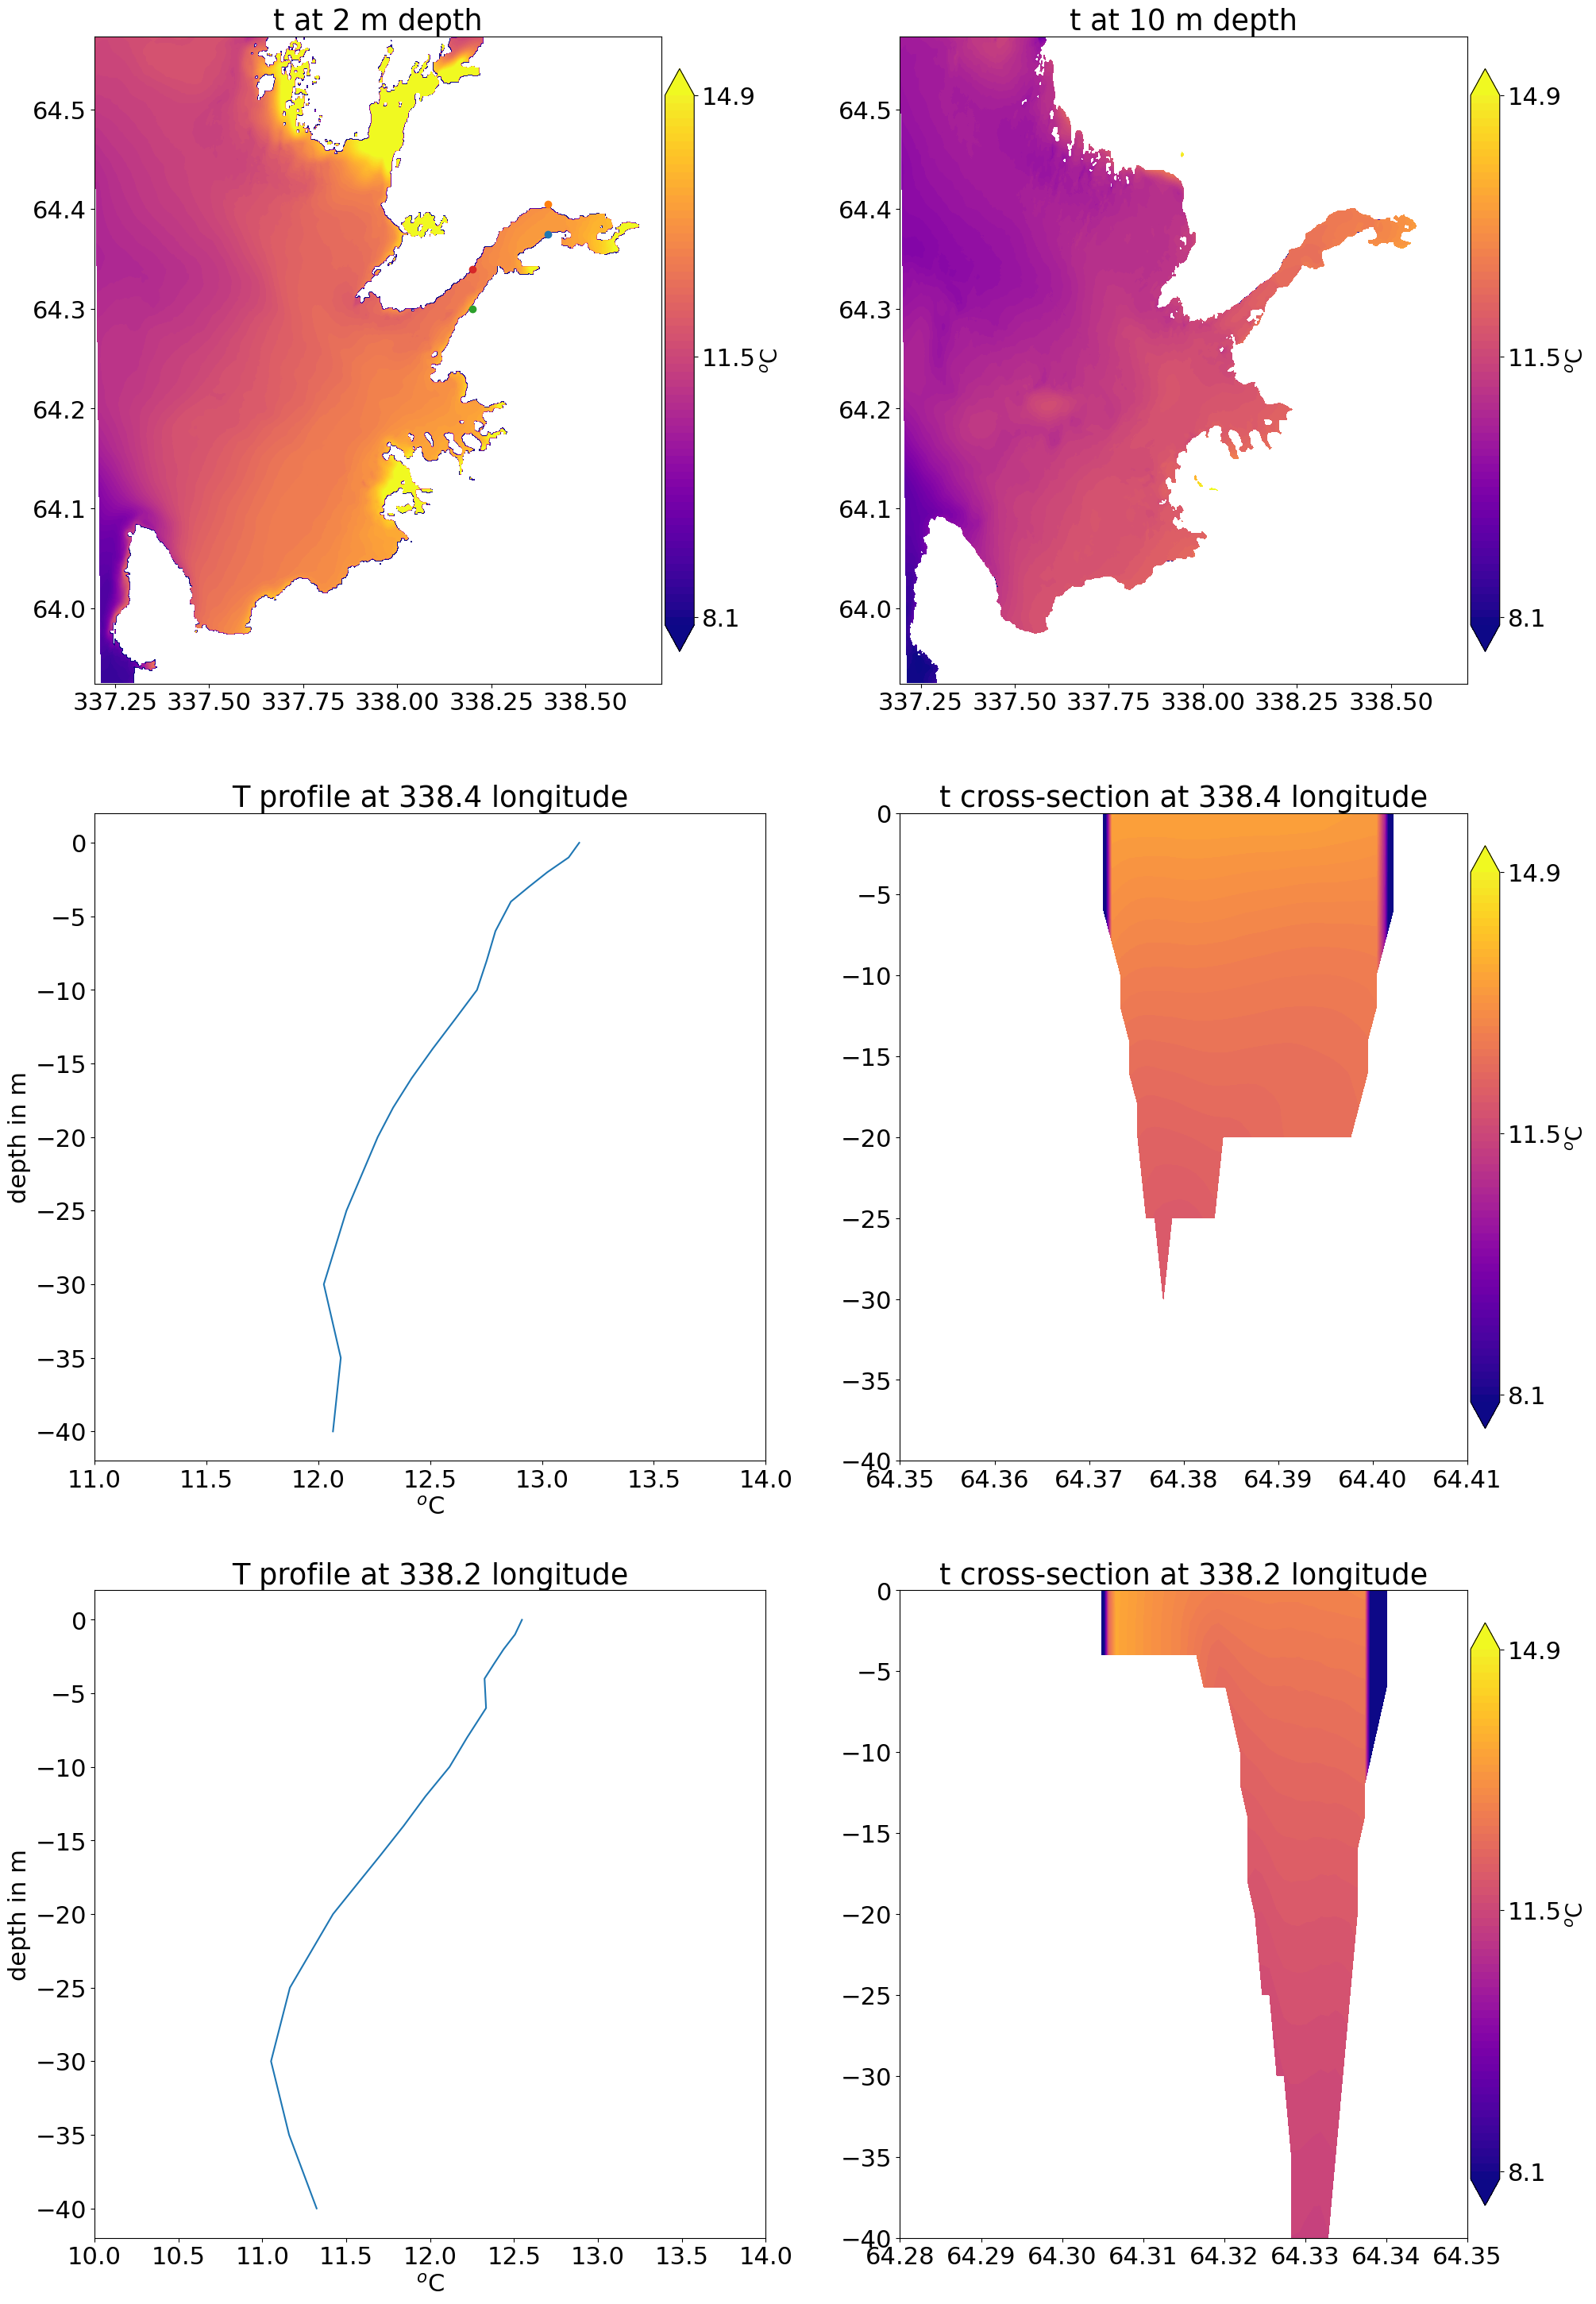

In [16]:
#plt.contourf(den.sel(depth=100,method='nearest'))
from matplotlib.collections import LineCollection
fig, axarr = plt.subplots(nrows=3, ncols=2, figsize=(8*3, 12*3))
axlist = axarr.flatten()
plt.rcParams.update({'font.size': 22})
k1=8
k2=15
k3=0.1

#k1=5
#k2=10
#k3=0.5

#k3=0.5
plt.rcParams['hatch.linewidth'] = 0.4
levels = np.arange(k1, k2, k3)
cmap = 'plasma'
cmap2 = 'BrBG'

lat1=64.375
lat2=64.405
lon1=338.4
lon2=338.4
lat3=64.30
lat4=64.34
lon3=338.2
lon4=338.2

cf1=axlist[0].contourf(t.lon,t.lat,t.sel(depth=-2),levels, extend="both", cmap=cmap, vmin=k1, vmax=k2)
cb1 = fig.colorbar(cf1, ax=axlist[0], orientation='vertical', shrink=0.9, pad=0.005,ticks=[k1+k3, (k1+k2)/2, k2-k3])
axlist[0].plot(lon1, lat1, marker="o", ls="")
axlist[0].plot(lon2, lat2, marker="o", ls="")
axlist[0].plot(lon3, lat3, marker="o", ls="")
axlist[0].plot(lon4, lat4, marker="o", ls="")
axlist[0].set_title('t at 2 m depth')
cb1.set_label('$^o$C', fontsize=20)
#pts = np.c_[lon1, lat1,lon1,lon1].reshape(len(lon1), 2, 2)
#axlist[0].add_collection(LineCollection(pts, color="crimson", label="Lines"))

cf1=axlist[1].contourf(t.lon,t.lat,t.sel(depth=-10),levels, extend="both", cmap=cmap, vmin=k1, vmax=k2)
cb1 = fig.colorbar(cf1, ax=axlist[1], orientation='vertical', shrink=0.9, pad=0.005,ticks=[k1+k3, (k1+k2)/2, k2-k3])
axlist[1].set_title('t at 10 m depth')
cb1.set_label('$^o$C', fontsize=20)

cf1=axlist[2].plot(t.sel(lon=slice(338.35,338.45)).mean('lon').sel(lat=slice(64.375,64.395)).mean('lat'), t.depth)
#cf1=axlist[2].plot(den.sel(lon=338,lat=64.28, method='nearest'))
axlist[2].set_title('T profile at 338.4 longitude')
axlist[2].set_ylabel('depth in m')
axlist[2].set_xlabel('$^o$C')
axlist[2].set_xlim([11,14])

cf1=axlist[3].contourf(t.lat,t.depth,t.sel(lon=338.4, method='nearest'),levels, extend="both", cmap=cmap, vmin=k1, vmax=k2)
cb1 = fig.colorbar(cf1, ax=axlist[3], orientation='vertical', shrink=0.9, pad=0.005,ticks=[k1+k3, (k1+k2)/2, k2-k3])
cb1.set_label('$^o$C', fontsize=20)
axlist[3].set_xlim([64.35,64.41])
axlist[3].set_ylim([-40,0])
axlist[3].set_title('t cross-section at 338.4 longitude')

cf1=axlist[4].plot(t.sel(lon=slice(338.15,338.20)).mean('lon').sel(lat=slice(64.29,64.33)).mean('lat'), t.depth)
#cf1=axlist[2].plot(den.sel(lon=338,lat=64.28, method='nearest'))
axlist[4].set_title('T profile at 338.2 longitude')
axlist[4].set_ylabel('depth in m')
axlist[4].set_xlabel('$^o$C')
axlist[4].set_xlim([10,14])

cf1=axlist[5].contourf(t.lat,t.depth,t.sel(lon=338.2, method='nearest'),levels, extend="both", cmap=cmap, vmin=k1, vmax=k2)
cb1 = fig.colorbar(cf1, ax=axlist[5], orientation='vertical', shrink=0.9, pad=0.005,ticks=[k1+k3, (k1+k2)/2, k2-k3])
cb1.set_label('$^o$C', fontsize=20)
axlist[5].set_title('t cross-section at 338.2 longitude')
axlist[5].set_xlim([64.28,64.35])
axlist[5].set_ylim([-40,0])